In [1]:
#Importing packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read data using pandas data frame
reddit_data = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Course\Reddit_data.csv')
twitter_data = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Course\Twitter_dataset.csv')

In [3]:
#Read first five reddit dataset
reddit_data.head()

id      comment_date                                       comment_body
0  kdmkbz  15-12-2020 14:21  This post appears to be about vaccines, please...
1  kdmkbz  15-12-2020 14:28  Who's ahead in the pool for the third vaccine ...
2  kdmkbz  15-12-2020 14:42  "asymptomatic infection was reduced by 63 perc...
3  kdmkbz  15-12-2020 15:36  > and appears to prevent the spread of the vir...
4  kdmkbz  15-12-2020 17:01  The fact that there are multiple companies mak...

In [4]:
#Read first five twitter
twitter_data.head()

id              date  \
0  1340539111971510000  20-12-2020 06:06   
1  1338463981372140000  14-12-2020 12:40   
2  1338463828057650000  14-12-2020 12:40   
3  1338463448309650000  14-12-2020 12:38   
4  1338455738520390000  14-12-2020 12:08   

                                                text  
0  Same folks said daikon paste could treat a cyt...  
1  vaccinated. More than 1.1 million new cases ha...  
2  US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...  
3  @sammwittings Oh great - thought you wouldnt b...  
4  #PfizerBioNTech's #COVID19 vaccines are making...

In [5]:
#Clean dataset
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())
    
    for i in punc:
        cleanedText = cleanedText.replace(i, '')
        
    a = [i for i in cleanedText if i.isalpha() or i == ' ']
            
    final_text = ' '.join(''.join(a).split())
    return final_text

In [6]:
#Rename the column names of reddit and twitter
reddit_data.rename(columns={'comment_body':'comment'}, inplace=True)
twitter_data.rename(columns={'text':'comment'}, inplace=True)


reddit_data.comment = reddit_data.comment.apply(cleanText)
twitter_data.comment = twitter_data.comment.apply(cleanText)

In [7]:
# Concat reddit data and twiter data to calculate the whole dataset available
concat_df = pd.concat([reddit_data, twitter_data], ignore_index=True)
concat_df.drop_duplicates(subset='comment', keep=False, inplace=True)

In [8]:
counts = [len(reddit_data), len(twitter_data), len(concat_df)]
labels = ['Reddit', 'Twitter', 'Total']
colors = ['#ff4500', '#1DA1F2', '#50C878']

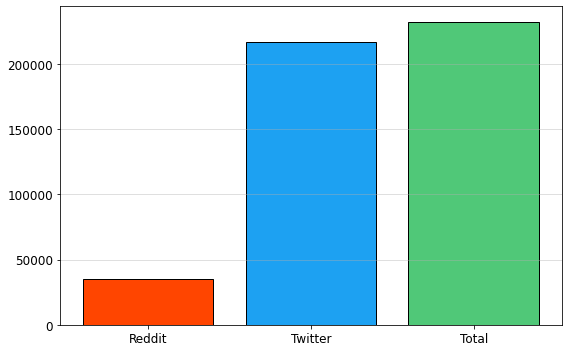

In [9]:
#Plot of total reddit,twitter and dataset available
plt.figure(figsize=(8,5))
plt.bar(labels, counts, color=colors, edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

In [10]:
#Summary of twitter dataset
twitter_data.describe()

id
count  2.169310e+05
mean   1.410279e+18
std    2.708187e+16
min    1.338370e+18
25%    1.384338e+18
50%    1.409789e+18
75%    1.429957e+18
max    1.463251e+18

In [11]:
#Summary of Reddit dataset
reddit_data.describe()

id      comment_date  comment
count    34768             34768    34768
unique     290             24410    32054
top     k2z0qt  10-12-2020 22:45  removed
freq       499                11      856

In [12]:
#Shape the dataset
twitter_data.shape

(216931, 3)

In [13]:
reddit_data.shape

(34768, 3)

In [14]:
#Find the data type
twitter_data.dtypes

id          int64
date       object
comment    object
dtype: object

In [15]:
reddit_data.dtypes

id              object
comment_date    object
comment         object
dtype: object

In [16]:
#Find if the data is null
twitter_data.isnull().sum()

id         0
date       0
comment    0
dtype: int64

In [17]:
#Find if the data is null for reddit dataset
reddit_data.isnull().sum()

id              0
comment_date    0
comment         0
dtype: int64

# Text Pre-processing

In [18]:
# Conver to Lowercase
twitter_data['comment'] = twitter_data['comment'].str.lower()
twitter_data['comment']

0         same folks said daikon paste could treat a cyt...
1         vaccinated more than million new cases have be...
2         us health care workers amp most vulnerable to ...
3         sammwittings oh great thought you wouldnt be a...
4         pfizerbiontechs covid vaccines are making thei...
                                ...                        
216926    urban bengaluru covidvaccine availability for ...
216927    bbmp bengaluru covidvaccine availability for a...
216928    urban bengaluru covidvaccine availability for ...
216929    they promote their vaccines leaving out the st...
216930    urban bengaluru covidvaccine availability for ...
Name: comment, Length: 216931, dtype: object

In [19]:
#Convert to lower case for reddit dataset
reddit_data['comment'] = reddit_data['comment'].str.lower()
reddit_data['comment']

0        this post appears to be about vaccines please ...
1        whos ahead in the pool for the third vaccine t...
2        asymptomatic infection was reduced by percent ...
3        and appears to prevent the spread of the virus...
4        the fact that there are multiple companies mak...
                               ...                        
34763    if a state receives lower quantities than they...
34764    military intelligence andor diplomatic bargain...
34765    or just not evenly allocated to states again t...
34766           i heard aliens just beamed it up zzzzzooop
34767    im not sure what youre trying to argue there a...
Name: comment, Length: 34768, dtype: object

In [20]:
# Remove URL's from comment
import re
twitter_data['comment'] = twitter_data['comment'].apply(lambda x:re.sub(r"http\S+", "", x))
twitter_data["comment"]

0         same folks said daikon paste could treat a cyt...
1         vaccinated more than million new cases have be...
2         us health care workers amp most vulnerable to ...
3         sammwittings oh great thought you wouldnt be a...
4         pfizerbiontechs covid vaccines are making thei...
                                ...                        
216926    urban bengaluru covidvaccine availability for ...
216927    bbmp bengaluru covidvaccine availability for a...
216928    urban bengaluru covidvaccine availability for ...
216929    they promote their vaccines leaving out the st...
216930    urban bengaluru covidvaccine availability for ...
Name: comment, Length: 216931, dtype: object

In [21]:
# Remove URL's from comment
reddit_data['comment'] = reddit_data['comment'].apply(lambda x:re.sub(r"http\S+", "", x))
reddit_data["comment"]

0        this post appears to be about vaccines please ...
1        whos ahead in the pool for the third vaccine t...
2        asymptomatic infection was reduced by percent ...
3        and appears to prevent the spread of the virus...
4        the fact that there are multiple companies mak...
                               ...                        
34763    if a state receives lower quantities than they...
34764    military intelligence andor diplomatic bargain...
34765    or just not evenly allocated to states again t...
34766           i heard aliens just beamed it up zzzzzooop
34767    im not sure what youre trying to argue there a...
Name: comment, Length: 34768, dtype: object

In [22]:
# Remove Punctuation 
import string
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
twitter_data["comment"] = twitter_data["comment"].apply(lambda text: remove_punctuation(text))
twitter_data["comment"]

0         same folks said daikon paste could treat a cyt...
1         vaccinated more than million new cases have be...
2         us health care workers amp most vulnerable to ...
3         sammwittings oh great thought you wouldnt be a...
4         pfizerbiontechs covid vaccines are making thei...
                                ...                        
216926    urban bengaluru covidvaccine availability for ...
216927    bbmp bengaluru covidvaccine availability for a...
216928    urban bengaluru covidvaccine availability for ...
216929    they promote their vaccines leaving out the st...
216930    urban bengaluru covidvaccine availability for ...
Name: comment, Length: 216931, dtype: object

In [23]:
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
reddit_data["comment"] = reddit_data["comment"].apply(lambda text: remove_punctuation(text))
reddit_data["comment"]

0        this post appears to be about vaccines please ...
1        whos ahead in the pool for the third vaccine t...
2        asymptomatic infection was reduced by percent ...
3        and appears to prevent the spread of the virus...
4        the fact that there are multiple companies mak...
                               ...                        
34763    if a state receives lower quantities than they...
34764    military intelligence andor diplomatic bargain...
34765    or just not evenly allocated to states again t...
34766           i heard aliens just beamed it up zzzzzooop
34767    im not sure what youre trying to argue there a...
Name: comment, Length: 34768, dtype: object

In [24]:
#Remove Single character and double space 
twitter_data["comment"] = twitter_data["comment"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
twitter_data["comment"] = twitter_data["comment"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
twitter_data["comment"]

0         same folks said daikon paste could treatcytoki...
1         vaccinated more than million new cases have be...
2         us health care workers amp most vulnerable to ...
3         sammwittings oh great thought you wouldnt be a...
4         pfizerbiontechs covid vaccines are making thei...
                                ...                        
216926    urban bengaluru covidvaccine availability for ...
216927    bbmp bengaluru covidvaccine availability for a...
216928    urban bengaluru covidvaccine availability for ...
216929    they promote their vaccines leaving out the st...
216930    urban bengaluru covidvaccine availability for ...
Name: comment, Length: 216931, dtype: object

In [25]:
reddit_data["comment"] = reddit_data["comment"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
reddit_data["comment"] = reddit_data["comment"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
reddit_data["comment"]

0        this post appears to be about vaccines please ...
1        whos ahead in the pool for the third vaccine t...
2        asymptomatic infection was reduced by percent ...
3        and appears to prevent the spread of the virus...
4        the fact that there are multiple companies mak...
                               ...                        
34763    ifstate receives lower quantities than they di...
34764    military intelligence andor diplomatic bargain...
34765    or just not evenly allocated to states again t...
34766           i heard aliens just beamed it up zzzzzooop
34767    im not sure what youre trying to argue there a...
Name: comment, Length: 34768, dtype: object

In [26]:
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings

[nltk_data] Downloading package vader_lexicon to C:\Users\SWEEKRITHI
[nltk_data]     SHETTY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

twitter_data["comment"] = twitter_data["comment"].apply(lambda text: remove_stopwords(text))
twitter_data["comment"]

0         folks said daikon paste could treatcytokine st...
1         vaccinated million new cases confirmed past we...
2         us health care workers amp vulnerable receive ...
3         sammwittings oh great thought wouldnt able see...
4         pfizerbiontechs covid vaccines making way dist...
                                ...                        
216926    urban bengaluru covidvaccine availability pm f...
216927    bbmp bengaluru covidvaccine availability pm fr...
216928    urban bengaluru covidvaccine availability pm f...
216929    promote vaccines leaving stronger russia vacci...
216930    urban bengaluru covidvaccine availability pm f...
Name: comment, Length: 216931, dtype: object

In [28]:
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

reddit_data["comment"] = reddit_data["comment"].apply(lambda text: remove_stopwords(text))
reddit_data["comment"]

0        post appears vaccines please see faq answers f...
1                   whos ahead pool third vaccine approved
2        asymptomatic infection reduced percent first s...
3        appears prevent spread virus well hugely encou...
4        fact multiple companies making multiple vaccin...
                               ...                        
34763    ifstate receives lower quantities past may iss...
34764    military intelligence andor diplomatic bargain...
34765    evenly allocated states isntnet numbers game r...
34766                        heard aliens beamed zzzzzooop
34767    im sure youre trying argue bound missed doses ...
Name: comment, Length: 34768, dtype: object

In [29]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
twitter_data["comment"] = twitter_data["comment"].apply(str)
twitter_data["comment"] = twitter_data["comment"].apply(remove_emoji)
twitter_data["comment"]

0         folks said daikon paste could treatcytokine st...
1         vaccinated million new cases confirmed past we...
2         us health care workers amp vulnerable receive ...
3         sammwittings oh great thought wouldnt able see...
4         pfizerbiontechs covid vaccines making way dist...
                                ...                        
216926    urban bengaluru covidvaccine availability pm f...
216927    bbmp bengaluru covidvaccine availability pm fr...
216928    urban bengaluru covidvaccine availability pm f...
216929    promote vaccines leaving stronger russia vacci...
216930    urban bengaluru covidvaccine availability pm f...
Name: comment, Length: 216931, dtype: object

In [30]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
reddit_data["comment"] = reddit_data["comment"].apply(str)
reddit_data["comment"] = reddit_data["comment"].apply(remove_emoji)
reddit_data["comment"]

0        post appears vaccines please see faq answers f...
1                   whos ahead pool third vaccine approved
2        asymptomatic infection reduced percent first s...
3        appears prevent spread virus well hugely encou...
4        fact multiple companies making multiple vaccin...
                               ...                        
34763    ifstate receives lower quantities past may iss...
34764    military intelligence andor diplomatic bargain...
34765    evenly allocated states isntnet numbers game r...
34766                        heard aliens beamed zzzzzooop
34767    im sure youre trying argue bound missed doses ...
Name: comment, Length: 34768, dtype: object

In [31]:
# Single character and double space removal
twitter_data["comment"] = twitter_data["comment"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
twitter_data["comment"] = twitter_data["comment"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
twitter_data["comment"]

0         folks said daikon paste could treatcytokine st...
1         vaccinated million new cases confirmed past we...
2         us health care workers amp vulnerable receive ...
3         sammwittings oh great thought wouldnt able see...
4         pfizerbiontechs covid vaccines making way dist...
                                ...                        
216926    urban bengaluru covidvaccine availability pm f...
216927    bbmp bengaluru covidvaccine availability pm fr...
216928    urban bengaluru covidvaccine availability pm f...
216929    promote vaccines leaving stronger russia vacci...
216930    urban bengaluru covidvaccine availability pm f...
Name: comment, Length: 216931, dtype: object

In [32]:
# Single character and double space removal
reddit_data["comment"] = reddit_data["comment"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
reddit_data["comment"] = reddit_data["comment"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
reddit_data["comment"]

0        post appears vaccines please see faq answers f...
1                   whos ahead pool third vaccine approved
2        asymptomatic infection reduced percent first s...
3        appears prevent spread virus well hugely encou...
4        fact multiple companies making multiple vaccin...
                               ...                        
34763    ifstate receives lower quantities past may iss...
34764    military intelligence andor diplomatic bargain...
34765    evenly allocated states isntnet numbers game r...
34766                        heard aliens beamed zzzzzooop
34767    im sure youre trying argue bound missed doses ...
Name: comment, Length: 34768, dtype: object

In [33]:
# Most common words
from collections import Counter
cnt = Counter()
for text in twitter_data["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covaxin', 74089),
 ('dose', 48937),
 ('vaccine', 48508),
 ('moderna', 46823),
 ('covid', 38866),
 ('slots', 35479),
 ('covidvaccine', 14608),
 ('bbmp', 14203),
 ('pfizer', 14027),
 ('age', 13937)]

In [34]:
# Most common words
from collections import Counter
cnt = Counter()
for text in reddit_data["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('vaccine', 9204),
 ('people', 8339),
 ('get', 5235),
 ('vaccines', 4135),
 ('like', 3857),
 ('im', 3678),
 ('one', 3497),
 ('would', 3486),
 ('dont', 3167),
 ('covid', 3050)]

In [35]:
# Sentiment analysis
sid = SIA()
twitter_data['sentiments'] = twitter_data["comment"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))
twitter_data['Positive Sentiment'] = twitter_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
twitter_data['Neutral Sentiment'] = twitter_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
twitter_data['Negative Sentiment'] = twitter_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
twitter_data.head()

id              date  \
0  1340539111971510000  20-12-2020 06:06   
1  1338463981372140000  14-12-2020 12:40   
2  1338463828057650000  14-12-2020 12:40   
3  1338463448309650000  14-12-2020 12:38   
4  1338455738520390000  14-12-2020 12:08   

                                             comment  \
0  folks said daikon paste could treatcytokine st...   
1  vaccinated million new cases confirmed past we...   
2  us health care workers amp vulnerable receive ...   
3  sammwittings oh great thought wouldnt able see...   
4  pfizerbiontechs covid vaccines making way dist...   

                                          sentiments  Positive Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   
1  {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...            0.000001   
2  {'neg': 0.111, 'neu': 0.702, 'pos': 0.187, 'co...            0.187001   
3  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...            0.291001   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   

   Neutral Sentiment  Negative Sentiment  
0           1.000001            0.000001  
1           0.672001            0.328001  
2           0.702001            0.111001  
3           0.709001            0.000001  
4           1.000001            0.000001

In [36]:
# Sentiment analysis
sid = SIA()
reddit_data['sentiments'] = reddit_data["comment"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))
reddit_data['Positive Sentiment'] = reddit_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
reddit_data['Neutral Sentiment'] = reddit_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
reddit_data['Negative Sentiment'] = reddit_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
reddit_data.head()

id      comment_date  \
0  kdmkbz  15-12-2020 14:21   
1  kdmkbz  15-12-2020 14:28   
2  kdmkbz  15-12-2020 14:42   
3  kdmkbz  15-12-2020 15:36   
4  kdmkbz  15-12-2020 17:01   

                                             comment  \
0  post appears vaccines please see faq answers f...   
1             whos ahead pool third vaccine approved   
2  asymptomatic infection reduced percent first s...   
3  appears prevent spread virus well hugely encou...   
4  fact multiple companies making multiple vaccin...   

                                          sentiments  Positive Sentiment  \
0  {'neg': 0.07, 'neu': 0.79, 'pos': 0.14, 'compo...            0.140001   
1  {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...            0.359001   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   
3  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...            0.352001   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   

   Neutral Sentiment  Negative Sentiment  
0           0.790001            0.070001  
1           0.641001            0.000001  
2           1.000001            0.000001  
3           0.648001            0.000001  
4           1.000001            0.000001

# Feature engineering

In [37]:
#Calculate number of words
#Number of Words
twitter_data['Number_Of_Words'] = twitter_data["comment"].apply(lambda x:len(x.split(' ')))
#Average Word Length
twitter_data['Mean_Word_Length'] = twitter_data["comment"].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
twitter_data.head()

id              date  \
0  1340539111971510000  20-12-2020 06:06   
1  1338463981372140000  14-12-2020 12:40   
2  1338463828057650000  14-12-2020 12:40   
3  1338463448309650000  14-12-2020 12:38   
4  1338455738520390000  14-12-2020 12:08   

                                             comment  \
0  folks said daikon paste could treatcytokine st...   
1  vaccinated million new cases confirmed past we...   
2  us health care workers amp vulnerable receive ...   
3  sammwittings oh great thought wouldnt able see...   
4  pfizerbiontechs covid vaccines making way dist...   

                                          sentiments  Positive Sentiment  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   
1  {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...            0.000001   
2  {'neg': 0.111, 'neu': 0.702, 'pos': 0.187, 'co...            0.187001   
3  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...            0.291001   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   

   Neutral Sentiment  Negative Sentiment  Number_Of_Words  Mean_Word_Length  
0           1.000001            0.000001                8              7.12  
1           0.672001            0.328001                9              5.67  
2           0.702001            0.111001               14              6.29  
3           0.709001            0.000001               11              5.82  
4           1.000001            0.000001               10              7.40

In [38]:
#Number of Words
reddit_data['Number_Of_Words'] = reddit_data["comment"].apply(lambda x:len(x.split(' ')))
#Average Word Length
reddit_data['Mean_Word_Length'] = reddit_data["comment"].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
reddit_data.head()

id      comment_date  \
0  kdmkbz  15-12-2020 14:21   
1  kdmkbz  15-12-2020 14:28   
2  kdmkbz  15-12-2020 14:42   
3  kdmkbz  15-12-2020 15:36   
4  kdmkbz  15-12-2020 17:01   

                                             comment  \
0  post appears vaccines please see faq answers f...   
1             whos ahead pool third vaccine approved   
2  asymptomatic infection reduced percent first s...   
3  appears prevent spread virus well hugely encou...   
4  fact multiple companies making multiple vaccin...   

                                          sentiments  Positive Sentiment  \
0  {'neg': 0.07, 'neu': 0.79, 'pos': 0.14, 'compo...            0.140001   
1  {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...            0.359001   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   
3  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...            0.352001   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   

   Neutral Sentiment  Negative Sentiment  Number_Of_Words  Mean_Word_Length  
0           0.790001            0.070001               29              8.72  
1           0.641001            0.000001                6              5.50  
2           1.000001            0.000001                7              7.71  
3           0.648001            0.000001               20              7.35  
4           1.000001            0.000001               12              6.33

In [39]:
# Tokenization and lemmatization (Remove prefix and suffixes)
def tokenization(text):
    text = re.split('\W+', text)
    return text
twitter_data['tokenized'] = twitter_data['comment'].apply(lambda x: tokenization(x.lower()))
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
twitter_data['lemmatized'] = twitter_data['tokenized'].apply(lambda x: lemmatizer(x))
twitter_data.head()
twitter_data.tail()

id              date  \
216926  1460170772299660000  15-11-2021 09:00   
216927  1460163268262050000  15-11-2021 08:30   
216928  1460163224221850000  15-11-2021 08:30   
216929  1460156376995570000  15-11-2021 08:03   
216930  1460155671140130000  15-11-2021 08:00   

                                                  comment  \
216926  urban bengaluru covidvaccine availability pm f...   
216927  bbmp bengaluru covidvaccine availability pm fr...   
216928  urban bengaluru covidvaccine availability pm f...   
216929  promote vaccines leaving stronger russia vacci...   
216930  urban bengaluru covidvaccine availability pm f...   

                                               sentiments  Positive Sentiment  \
216926  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...            0.248001   
216927  {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...            0.268001   
216928  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...            0.248001   
216929  {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...            0.510001   
216930  {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...            0.248001   

        Neutral Sentiment  Negative Sentiment  Number_Of_Words  \
216926           0.752001            0.000001               11   
216927           0.732001            0.000001               10   
216928           0.752001            0.000001               11   
216929           0.490001            0.000001                7   
216930           0.752001            0.000001               11   

        Mean_Word_Length                                          tokenized  \
216926              6.55  [urban, bengaluru, covidvaccine, availability,...   
216927              6.60  [bbmp, bengaluru, covidvaccine, availability, ...   
216928              6.55  [urban, bengaluru, covidvaccine, availability,...   
216929              7.29  [promote, vaccines, leaving, stronger, russia,...   
216930              6.55  [urban, bengaluru, covidvaccine, availability,...   

                                               lemmatized  
216926  [urban, bengaluru, covidvaccine, availability,...  
216927  [bbmp, bengaluru, covidvaccine, availability, ...  
216928  [urban, bengaluru, covidvaccine, availability,...  
216929  [promote, vaccine, leaving, stronger, russia, ...  
216930  [urban, bengaluru, covidvaccine, availability,...

In [40]:
# Tokenization and lemmatization
def tokenization(text):
    text = re.split('\W+', text)
    return text
reddit_data['tokenized'] = reddit_data['comment'].apply(lambda x: tokenization(x.lower()))
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
reddit_data['lemmatized'] = reddit_data['tokenized'].apply(lambda x: lemmatizer(x))
reddit_data.head()
reddit_data.tail()

id      comment_date  \
34763  ky9846  16-01-2021 02:22   
34764  ky9846  16-01-2021 03:10   
34765  ky9846  16-01-2021 02:35   
34766  ky9846  16-01-2021 10:48   
34767  ky9846  16-01-2021 02:43   

                                                 comment  \
34763  ifstate receives lower quantities past may iss...   
34764  military intelligence andor diplomatic bargain...   
34765  evenly allocated states isntnet numbers game r...   
34766                      heard aliens beamed zzzzzooop   
34767  im sure youre trying argue bound missed doses ...   

                                              sentiments  Positive Sentiment  \
34763  {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...            0.000001   
34764  {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...            0.307001   
34765  {'neg': 0.131, 'neu': 0.842, 'pos': 0.027, 'co...            0.027001   
34766  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...            0.000001   
34767  {'neg': 0.443, 'neu': 0.452, 'pos': 0.104, 'co...            0.104001   

       Neutral Sentiment  Negative Sentiment  Number_Of_Words  \
34763           0.769001            0.231001               24   
34764           0.693001            0.000001                8   
34765           0.842001            0.131001               45   
34766           1.000001            0.000001                4   
34767           0.452001            0.443001               15   

       Mean_Word_Length                                          tokenized  \
34763              6.50  [ifstate, receives, lower, quantities, past, m...   
34764              7.50  [military, intelligence, andor, diplomatic, ba...   
34765              6.33  [evenly, allocated, states, isntnet, numbers, ...   
34766              6.50                 [heard, aliens, beamed, zzzzzooop]   
34767              5.27  [im, sure, youre, trying, argue, bound, missed...   

                                              lemmatized  
34763  [ifstate, receives, lower, quantity, past, may...  
34764  [military, intelligence, andor, diplomatic, ba...  
34765  [evenly, allocated, state, isntnet, number, ga...  
34766                  [heard, alien, beamed, zzzzzooop]  
34767  [im, sure, youre, trying, argue, bound, missed...

# Analysis: Summary

(-0.5, 399.5, 199.5, -0.5)

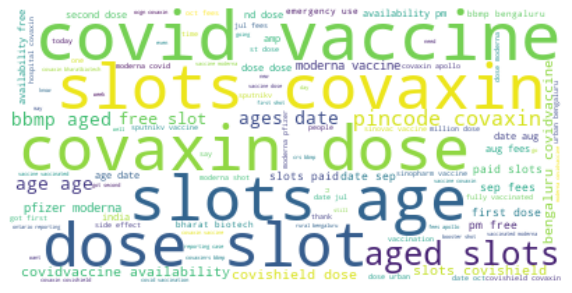

In [41]:
# World Cloud
tweet_All = " ".join(review for review in twitter_data["comment"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

(-0.5, 399.5, 199.5, -0.5)

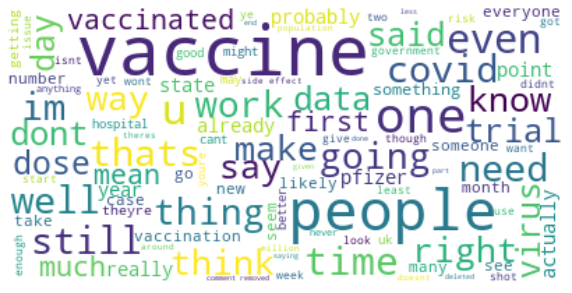

In [42]:
# World Cloud
tweet_All = " ".join(review for review in reddit_data["comment"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

0.04573391968413919
0.10903101415196535
0.8451844546468692


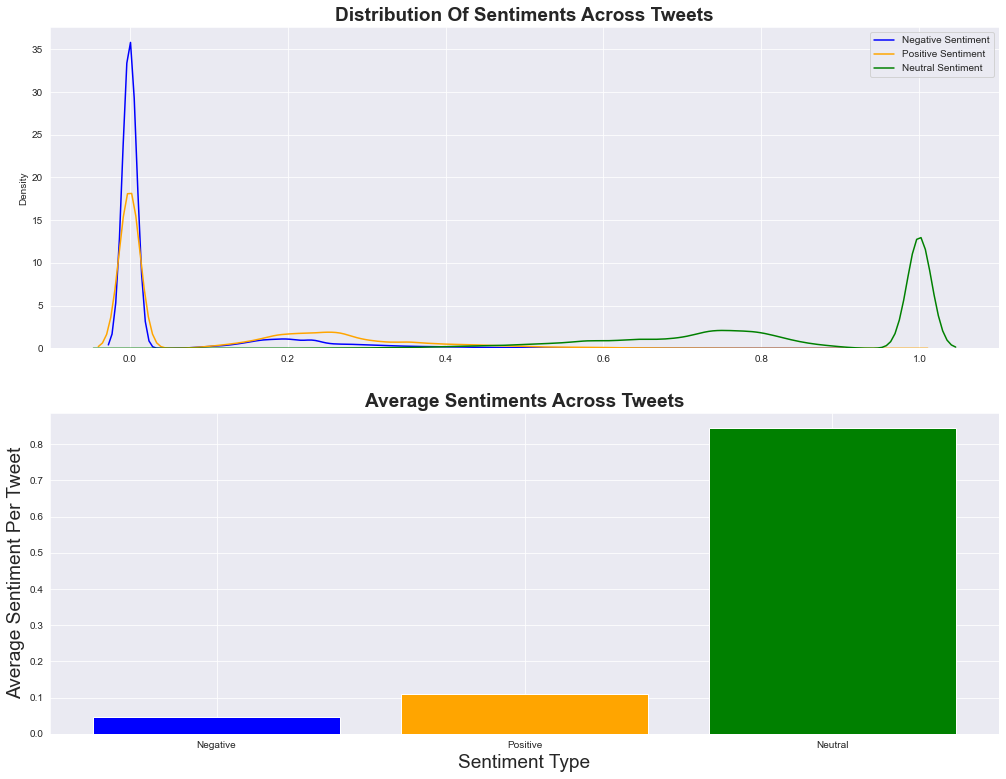

In [43]:
# Sentiment Distribution
plt.subplot(2,1,1)
plt.title('Distribution Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(twitter_data['Negative Sentiment'], color = 'blue')
sns.kdeplot(twitter_data['Positive Sentiment'], color = 'orange')
sns.kdeplot(twitter_data['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('Average Sentiments Across Tweets',fontsize=19,fontweight='bold')
neg_total_avg = (twitter_data['Negative Sentiment'].sum())/len(twitter_data.index)
print(neg_total_avg)
pos_total_avg = (twitter_data['Positive Sentiment'].sum())/len(twitter_data.index)
print(pos_total_avg)
neu_total_avg = (twitter_data['Neutral Sentiment'].sum())/len(twitter_data.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]
plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per Tweet',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()

0.09806111274735388
0.15870466428900137
0.7362194479981592


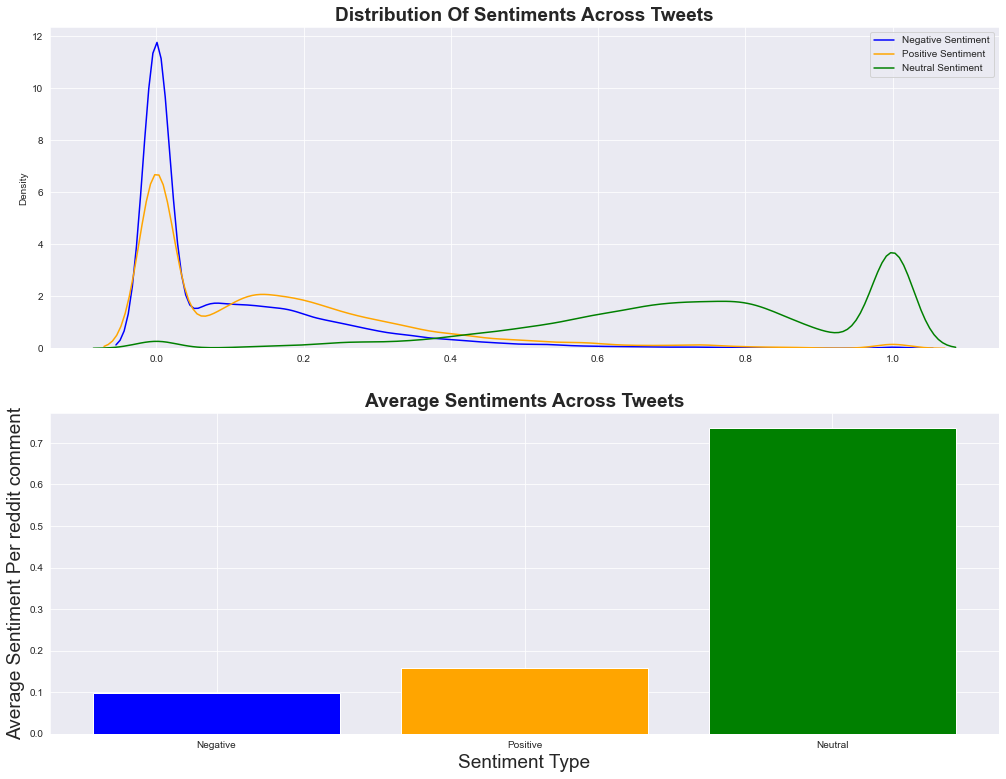

In [44]:
# Sentiment Distribution graph
plt.subplot(2,1,1)
plt.title('Distribution Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(reddit_data['Negative Sentiment'], color = 'blue')
sns.kdeplot(reddit_data['Positive Sentiment'], color = 'orange')
sns.kdeplot(reddit_data['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('Average Sentiments Across Tweets',fontsize=19,fontweight='bold')
neg_total_avg = (reddit_data['Negative Sentiment'].sum())/len(reddit_data.index)
print(neg_total_avg)
pos_total_avg = (reddit_data['Positive Sentiment'].sum())/len(reddit_data.index)
print(pos_total_avg)
neu_total_avg = (reddit_data['Neutral Sentiment'].sum())/len(reddit_data.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]
plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per reddit comment',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()

In [45]:
#Find 50 most common words
all_words=[]
for i in range(len(twitter_data['lemmatized'])):
    a=twitter_data['lemmatized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:50].rename_axis('Common Words').reset_index(name='count')

fig = ex.treemap(common_words, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()

In [46]:
all_words=[]
for i in range(len(reddit_data['lemmatized'])):
    a=reddit_data['lemmatized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:50].rename_axis('Common Words').reset_index(name='count')

fig = ex.treemap(common_words, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()